# XGBoost Classification Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
# Create more data
dataset['Increase/Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase/Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,-1,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,-1,-1,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,-1,1,-0.021531


In [4]:
dataset.shape

(1257, 10)

In [5]:
X = dataset[['Open', 'High', 'Low', 'Volume']].values
y = dataset['Buy_Sell'].values

In [6]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    from xgboost import XGBClassifier

# XGboost algorithm
model = XGBClassifier()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [8]:
evaluate_set  = [(X_train, y_train), (X_test,y_test)]

In [9]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evaluate_set)

[0]	validation_0-logloss:0.64969	validation_1-logloss:0.69235
[1]	validation_0-logloss:0.61119	validation_1-logloss:0.70193
[2]	validation_0-logloss:0.58345	validation_1-logloss:0.71234
[3]	validation_0-logloss:0.56719	validation_1-logloss:0.71682
[4]	validation_0-logloss:0.55290	validation_1-logloss:0.71857
[5]	validation_0-logloss:0.54003	validation_1-logloss:0.71842
[6]	validation_0-logloss:0.52663	validation_1-logloss:0.72820
[7]	validation_0-logloss:0.51963	validation_1-logloss:0.72989
[8]	validation_0-logloss:0.51474	validation_1-logloss:0.73120
[9]	validation_0-logloss:0.50941	validation_1-logloss:0.72960
[10]	validation_0-logloss:0.50106	validation_1-logloss:0.73037
[11]	validation_0-logloss:0.49746	validation_1-logloss:0.73208
[12]	validation_0-logloss:0.48691	validation_1-logloss:0.73872
[13]	validation_0-logloss:0.48311	validation_1-logloss:0.74066
[14]	validation_0-logloss:0.47849	validation_1-logloss:0.74415
[15]	validation_0-logloss:0.46784	validation_1-logloss:0.75528
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=20, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

Accuracy: 0.499


In [11]:
results = model.evals_result()

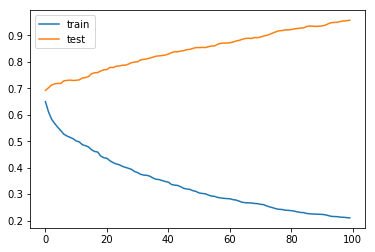

In [12]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.4153372920397715


In [14]:
print('XGBoost Classifier Score:', model.score(X_test, y_test))

XGBoost Classifier Score: 0.49920508744038156


## Tune XGBoost Model Using Learning Curves

In [15]:
model = XGBClassifier(n_estimators=500)

In [16]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evaluate_set)

[0]	validation_0-logloss:0.64969	validation_1-logloss:0.69235
[1]	validation_0-logloss:0.61119	validation_1-logloss:0.70193
[2]	validation_0-logloss:0.58345	validation_1-logloss:0.71234
[3]	validation_0-logloss:0.56719	validation_1-logloss:0.71682
[4]	validation_0-logloss:0.55290	validation_1-logloss:0.71857
[5]	validation_0-logloss:0.54003	validation_1-logloss:0.71842
[6]	validation_0-logloss:0.52663	validation_1-logloss:0.72820
[7]	validation_0-logloss:0.51963	validation_1-logloss:0.72989
[8]	validation_0-logloss:0.51474	validation_1-logloss:0.73120
[9]	validation_0-logloss:0.50941	validation_1-logloss:0.72960
[10]	validation_0-logloss:0.50106	validation_1-logloss:0.73037
[11]	validation_0-logloss:0.49746	validation_1-logloss:0.73208
[12]	validation_0-logloss:0.48691	validation_1-logloss:0.73872
[13]	validation_0-logloss:0.48311	validation_1-logloss:0.74066
[14]	validation_0-logloss:0.47849	validation_1-logloss:0.74415
[15]	validation_0-logloss:0.46784	validation_1-logloss:0.75528
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=20, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [17]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

Accuracy: 0.490


In [18]:
results = model.evals_result()

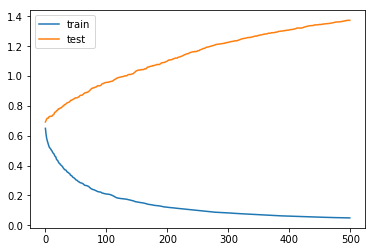

In [19]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.4287531113177527


In [21]:
print('XGBoost Classifier Score:', model.score(X_test, y_test))

XGBoost Classifier Score: 0.48966613672496023


## Tune XGBoost Model Using Learning Curves Part 2

In [22]:
model = XGBClassifier(n_estimators=500, eta=0.05)

In [23]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evaluate_set)

[0]	validation_0-logloss:0.68511	validation_1-logloss:0.69224
[1]	validation_0-logloss:0.67806	validation_1-logloss:0.69206
[2]	validation_0-logloss:0.67045	validation_1-logloss:0.69140
[3]	validation_0-logloss:0.66379	validation_1-logloss:0.69106
[4]	validation_0-logloss:0.65699	validation_1-logloss:0.69100
[5]	validation_0-logloss:0.65090	validation_1-logloss:0.69152
[6]	validation_0-logloss:0.64433	validation_1-logloss:0.69249
[7]	validation_0-logloss:0.63812	validation_1-logloss:0.69356
[8]	validation_0-logloss:0.63208	validation_1-logloss:0.69468
[9]	validation_0-logloss:0.62683	validation_1-logloss:0.69508
[10]	validation_0-logloss:0.62172	validation_1-logloss:0.69571
[11]	validation_0-logloss:0.61671	validation_1-logloss:0.69630
[12]	validation_0-logloss:0.61192	validation_1-logloss:0.69729
[13]	validation_0-logloss:0.60737	validation_1-logloss:0.69878
[14]	validation_0-logloss:0.60293	validation_1-logloss:0.69934
[15]	validation_0-logloss:0.59844	validation_1-logloss:0.70096
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
       gpu_id=-1, importance_type='gain', interaction_constraints='',
       learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=20, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [24]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

Accuracy: 0.515


In [25]:
results = model.evals_result()

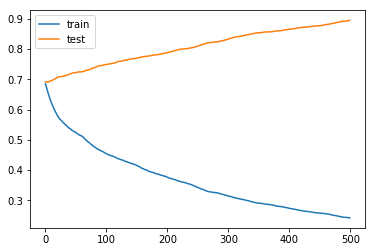

In [26]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.3926904341844955


In [28]:
print('XGBoost Classifier Score:', model.score(X_test, y_test))

XGBoost Classifier Score: 0.5151033386327504


## Tune XGBoost Model Using Learning Curves Part 3

In [29]:
model = XGBClassifier(n_estimators=2000, eta=0.05)

In [30]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evaluate_set)

[0]	validation_0-logloss:0.68511	validation_1-logloss:0.69224
[1]	validation_0-logloss:0.67806	validation_1-logloss:0.69206
[2]	validation_0-logloss:0.67045	validation_1-logloss:0.69140
[3]	validation_0-logloss:0.66379	validation_1-logloss:0.69106
[4]	validation_0-logloss:0.65699	validation_1-logloss:0.69100
[5]	validation_0-logloss:0.65090	validation_1-logloss:0.69152
[6]	validation_0-logloss:0.64433	validation_1-logloss:0.69249
[7]	validation_0-logloss:0.63812	validation_1-logloss:0.69356
[8]	validation_0-logloss:0.63208	validation_1-logloss:0.69468
[9]	validation_0-logloss:0.62683	validation_1-logloss:0.69508
[10]	validation_0-logloss:0.62172	validation_1-logloss:0.69571
[11]	validation_0-logloss:0.61671	validation_1-logloss:0.69630
[12]	validation_0-logloss:0.61192	validation_1-logloss:0.69729
[13]	validation_0-logloss:0.60737	validation_1-logloss:0.69878
[14]	validation_0-logloss:0.60293	validation_1-logloss:0.69934
[15]	validation_0-logloss:0.59844	validation_1-logloss:0.70096
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=0,
       gpu_id=-1, importance_type='gain', interaction_constraints='',
       learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=2000, n_jobs=20, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       use_label_encoder=True, validate_parameters=1, verbosity=None)

In [31]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

Accuracy: 0.501


In [32]:
results = model.evals_result()

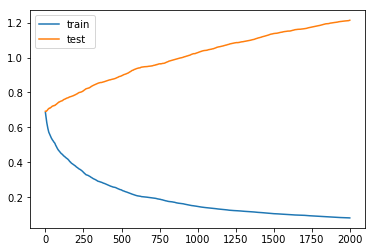

In [33]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.4130889390839936


In [35]:
print('XGBoost Classifier Score:', model.score(X_test, y_test))

XGBoost Classifier Score: 0.5007949125596184


## Tune XGBoost Model Using Learning Curves Part 4

In [36]:
model = XGBClassifier(n_estimators=2000, eta=0.05, subsample=0.5, colsample_bytree=0.5)

In [37]:
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evaluate_set)

[0]	validation_0-logloss:0.68735	validation_1-logloss:0.69263
[1]	validation_0-logloss:0.68366	validation_1-logloss:0.69295
[2]	validation_0-logloss:0.67885	validation_1-logloss:0.69390
[3]	validation_0-logloss:0.67376	validation_1-logloss:0.69452
[4]	validation_0-logloss:0.66922	validation_1-logloss:0.69471
[5]	validation_0-logloss:0.66632	validation_1-logloss:0.69519
[6]	validation_0-logloss:0.66370	validation_1-logloss:0.69554
[7]	validation_0-logloss:0.66181	validation_1-logloss:0.69635
[8]	validation_0-logloss:0.65846	validation_1-logloss:0.69649
[9]	validation_0-logloss:0.65539	validation_1-logloss:0.69670
[10]	validation_0-logloss:0.65312	validation_1-logloss:0.69640
[11]	validation_0-logloss:0.64910	validation_1-logloss:0.69822
[12]	validation_0-logloss:0.64638	validation_1-logloss:0.69835
[13]	validation_0-logloss:0.64321	validation_1-logloss:0.69927
[14]	validation_0-logloss:0.63930	validation_1-logloss:0.70109
[15]	validation_0-logloss:0.63738	validation_1-logloss:0.70146
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0,
       gpu_id=-1, importance_type='gain', interaction_constraints='',
       learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=2000, n_jobs=20, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=0.5,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [38]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % score)

Accuracy: 0.504


In [39]:
results = model.evals_result()

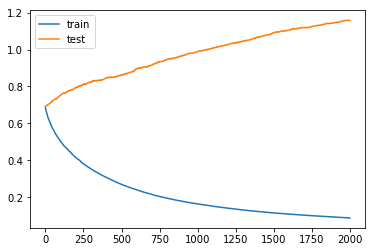

In [40]:
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 1.4085814668692866


In [42]:
print('XGBoost Classifier Score:', model.score(X_test, y_test))

XGBoost Classifier Score: 0.5039745627980922
